In [1]:
import pandas as pd
df = pd.read_csv('./Dataset/bank.csv')

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<br>EDA has been done in sklearn part hence here I am going to directly setting up environment and creating model

In [3]:
df.shape

(4521, 17)

take 10% data for prediction  assumining that this 10% data is not available at this point of time 

In [4]:
data = df.sample(frac=0.90, random_state=33).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4069, 17)
Unseen Data For Predictions: (452, 17)


In [5]:
from pycaret.classification import *

In [6]:
env_clf1 = setup(data=data, target='y', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(4069, 17)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.8985,0.8806,0.4213,0.5963,0.4916,0.4373,0.4465,0.0808
1,CatBoost Classifier,0.8982,0.9113,0.3408,0.6295,0.4367,0.3867,0.4113,7.9172
2,Ridge Classifier,0.8971,0.0000,0.2513,0.6909,0.3644,0.3209,0.3722,0.0222
3,Gradient Boosting Classifier,0.8968,0.8994,0.3618,0.6135,0.4505,0.3978,0.4171,1.1096
4,Extreme Gradient Boosting,0.8961,0.8926,0.3948,0.5902,0.4701,0.4152,0.4270,0.5569
5,Light Gradient Boosting Machine,0.8940,0.8923,0.3439,0.5829,0.4302,0.3763,0.3934,0.3211
6,Ada Boost Classifier,0.8912,0.8861,0.3471,0.5693,0.4288,0.3725,0.3878,0.3915
7,Extra Trees Classifier,0.8894,0.8801,0.2034,0.5993,0.3010,0.2562,0.3022,0.3889
8,Logistic Regression,0.8887,0.8388,0.1910,0.5958,0.2816,0.2390,0.2879,0.2018
9,Random Forest Classifier,0.8887,0.8260,0.1855,0.6009,0.2788,0.2363,0.2862,0.0778


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

The best performance in terms of Recall is best for QDA but since we are focusing on Logistics for which accuracy is 0.8887. lets create a model for the same

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [9]:
logReg=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8737,0.7674,0.0606,0.2857,0.1000,0.0620,0.0843
1,0.9018,0.8457,0.2121,0.7778,0.3333,0.2985,0.3736
2,0.8982,0.8213,0.1515,0.8333,0.2564,0.2289,0.3289
3,0.8947,0.8736,0.1818,0.6667,0.2857,0.2484,0.3109
4,0.8912,0.8733,0.2353,0.6154,0.3404,0.2938,0.3346
5,0.8912,0.8501,0.1471,0.7143,0.2439,0.2118,0.2913
6,0.8772,0.8199,0.2941,0.4762,0.3636,0.2999,0.3105
7,0.8912,0.8535,0.2941,0.5882,0.3922,0.3396,0.3644
8,0.8803,0.8363,0.1515,0.4545,0.2273,0.1796,0.2119
9,0.8873,0.8470,0.1818,0.5455,0.2727,0.2279,0.2689


In [10]:
logReg_tunned = tune_model(logReg, fold=10, round=2, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.79,0.86,0.76,0.33,0.46,0.35,0.40
1,0.80,0.86,0.82,0.35,0.49,0.39,0.45
2,0.82,0.89,0.73,0.36,0.48,0.39,0.43
3,0.81,0.86,0.70,0.34,0.46,0.35,0.39
4,0.79,0.88,0.82,0.34,0.48,0.38,0.44
5,0.80,0.88,0.76,0.34,0.47,0.37,0.41
6,0.79,0.83,0.76,0.33,0.46,0.35,0.40
7,0.77,0.89,0.88,0.33,0.48,0.37,0.44
8,0.82,0.85,0.73,0.36,0.48,0.39,0.42
9,0.79,0.86,0.82,0.34,0.48,0.38,0.43


# Plotting graphs

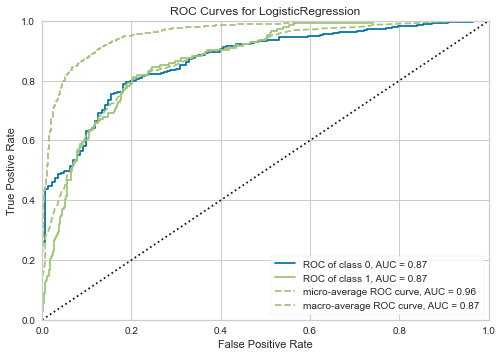

In [11]:
plot_model(logReg, plot = 'auc')

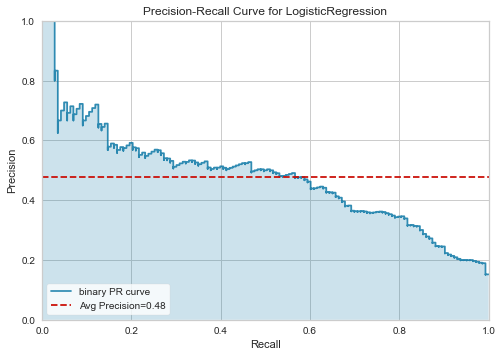

In [12]:
plot_model(logReg, plot = 'pr')

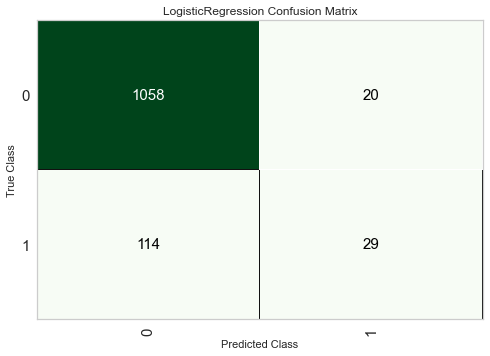

In [13]:
plot_model(logReg, plot = 'confusion_matrix')

In [14]:
evaluate_model(logReg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
predict_model(logReg, data=data_unseen)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Label,Score
0,45,services,divorced,secondary,no,-179,no,no,unknown,3,jul,155,2,-1,0,unknown,no,0,0.0756
1,31,services,single,secondary,no,481,yes,no,cellular,20,nov,106,2,183,2,failure,no,0,0.0453
2,28,admin.,married,secondary,no,12,yes,no,cellular,30,jan,73,3,256,3,other,no,0,0.0459
3,45,blue-collar,married,primary,no,0,no,no,unknown,23,may,574,5,-1,0,unknown,no,0,0.0933
4,51,management,married,tertiary,no,176,yes,yes,unknown,1,jun,8,1,687,2,failure,no,0,0.0342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0,0.0390
448,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0,0.0156
449,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0,0.0205
450,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0,0.1284


# Finalizing the model

In [16]:
final_logReg_model = finalize_model(logReg)

# Saving the model

In [17]:
save_model(final_logReg_model,'Final_LogisticReg_Model_08132020')

Transformation Pipeline and Model Succesfully Saved


# Loding the saved model and testing it again on unseen data 

In [18]:
# on the place of file name provide full path of file if it is not in the same directory
saved_model = load_model('Final_LogisticReg_Model_08132020')

Transformation Pipeline and Model Sucessfully Loaded


In [19]:
prediction = predict_model(saved_model, data=data_unseen)

In [21]:
prediction.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Label,Score
0,45,services,divorced,secondary,no,-179,no,no,unknown,3,jul,155,2,-1,0,unknown,no,0,0.0588
1,31,services,single,secondary,no,481,yes,no,cellular,20,nov,106,2,183,2,failure,no,0,0.0580
2,28,admin.,married,secondary,no,12,yes,no,cellular,30,jan,73,3,256,3,other,no,0,0.0676
3,45,blue-collar,married,primary,no,0,no,no,unknown,23,may,574,5,-1,0,unknown,no,0,0.0822
4,51,management,married,tertiary,no,176,yes,yes,unknown,1,jun,8,1,687,2,failure,no,0,0.0970
